In [99]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from statannotations.Annotator import Annotator

In [100]:
train_values_df = pd.read_csv('./sem-eval-2018-train_values_df.csv', index_col=0)
train_values_df.head()

,text_id,anger_x,anticipation_x,disgust_x,fear_x,joy_x,love_x,neutral_x,optimism_x,pessimism_x,...,disgust_y,fear_y,joy_y,love_y,neutral_y,optimism_y,pessimism_y,sadness_y,surprise_y,trust_y
0,1423371033,0.447224,0.478244,0.507856,0.512513,0.466411,0.534981,0.535231,0.471830,0.512556,...,1,1,0,0,0,0,0,0,0,0
1,1423361689,0.484053,0.474357,0.476472,0.519102,0.537730,0.524788,0.531705,0.505180,0.504612,...,1,0,0,0,0,0,0,0,0,0
2,1423371054,0.433141,0.445078,0.509951,0.558769,0.509879,0.555780,0.529561,0.521922,0.483993,...,0,0,1,0,0,0,0,0,0,1
3,1423367730,0.390878,0.451280,0.452330,0.550022,0.519740,0.552396,0.513006,0.504668,0.486874,...,0,0,1,0,0,1,0,0,0,0
4,1423362552,0.527467,0.543530,0.512486,0.498922,0.517301,0.577642,0.539454,0.513952,0.505770,...,0,0,1,1,0,1,0,0,0,0


In [101]:
print(train_values_df.columns.to_list())

['text_id', 'anger_x', 'anticipation_x', 'disgust_x', 'fear_x', 'joy_x', 'love_x', 'neutral_x', 'optimism_x', 'pessimism_x', 'sadness_x', 'surprise_x', 'trust_x', 'epoch_no', '_unit_id', 'annotators_count', 'emotion', 'emotionsecondary', 'secondary_emotions', 'id', 'tweet', 'all_emotions_anger', 'all_emotions_anticipation', 'all_emotions_disgust', 'all_emotions_fear', 'all_emotions_joy', 'all_emotions_love', 'all_emotions_neutral', 'all_emotions_optimism', 'all_emotions_pessimism', 'all_emotions_sadness', 'all_emotions_surprise', 'all_emotions_trust', 'anger_agr_factor', 'anticipation_agr_factor', 'disgust_agr_factor', 'fear_agr_factor', 'joy_agr_factor', 'love_agr_factor', 'neutral_agr_factor', 'optimism_agr_factor', 'pessimism_agr_factor', 'sadness_agr_factor', 'surprise_agr_factor', 'trust_agr_factor', 'anger_y', 'anticipation_y', 'disgust_y', 'fear_y', 'joy_y', 'love_y', 'neutral_y', 'optimism_y', 'pessimism_y', 'sadness_y', 'surprise_y', 'trust_y']


In [102]:
train_values_df['anger_agr_factor']

0        0.142857
1        0.857143
2        0.000000
3        0.000000
4        0.000000
           ...   
29938    0.000000
29939    0.000000
29940    0.857143
29941    0.000000
29942    0.000000
Name: anger_agr_factor, Length: 29943, dtype: float64

In [103]:
len(train_values_df)

29943

In [104]:
train_values_df['epoch_no'].value_counts()

1    9981
2    9981
3    9981
Name: epoch_no, dtype: int64

In [164]:
for emotion in ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'neutral', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']:
    train_values_df[emotion + '_1'] = train_values_df[emotion + '_x']
    train_values_df[emotion + '_0'] = train_values_df[emotion + '_x'].apply(lambda val : 1-val)

train_values_df.loc[:, :].head()

,text_id,anger_x,anticipation_x,disgust_x,fear_x,joy_x,love_x,neutral_x,optimism_x,pessimism_x,...,optimism_1,optimism_0,pessimism_1,pessimism_0,sadness_1,sadness_0,surprise_1,surprise_0,trust_1,trust_0
0,1423371033,0.447224,0.478244,0.507856,0.512513,0.466411,0.534981,0.535231,0.471830,0.512556,...,0.471830,0.528170,0.512556,0.487444,0.516431,0.483569,0.530986,0.469014,0.540594,0.459406
1,1423361689,0.484053,0.474357,0.476472,0.519102,0.537730,0.524788,0.531705,0.505180,0.504612,...,0.505180,0.494820,0.504612,0.495388,0.495612,0.504388,0.509389,0.490611,0.509459,0.490541
2,1423371054,0.433141,0.445078,0.509951,0.558769,0.509879,0.555780,0.529561,0.521922,0.483993,...,0.521922,0.478078,0.483993,0.516007,0.527948,0.472052,0.574498,0.425502,0.557468,0.442532
3,1423367730,0.390878,0.451280,0.452330,0.550022,0.519740,0.552396,0.513006,0.504668,0.486874,...,0.504668,0.495332,0.486874,0.513126,0.527592,0.472408,0.500917,0.499083,0.518392,0.481608
4,1423362552,0.527467,0.543530,0.512486,0.498922,0.517301,0.577642,0.539454,0.513952,0.505770,...,0.513952,0.486048,0.505770,0.494230,0.491060,0.508940,0.545766,0.454234,0.501772,0.498228


In [168]:
def get_confidence(label, label_0_mean, label_1_mean):
    if label == 0:
        return label_0_mean
    return label_1_mean

def get_variability(label, label_0_std, label_1_std):
    if label == 0:
        return label_0_std
    return label_1_std

def get_correctness(label, label_0_last, label_1_last):
    if label == 0:
        return round(label_0_last*5)/5
    return round(label_1_last*5)/5

In [169]:
emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'neutral', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']

In [170]:
metrics = ['mean', 'std', 'last']
def build_cartography_df(train_values_df):
    agg_columns = ['text_id']
    
    extra_columns = ['text_id', 'annotators_count', 'emotion', 'emotionsecondary', 'secondary_emotions', 'id', 'tweet', 'all_emotions_anger', 'all_emotions_anticipation', 'all_emotions_disgust', 'all_emotions_fear', 'all_emotions_joy', 'all_emotions_love', 'all_emotions_neutral', 'all_emotions_optimism', 'all_emotions_pessimism', 'all_emotions_sadness', 'all_emotions_surprise', 'all_emotions_trust', 'anger_agr_factor', 'anticipation_agr_factor', 'disgust_agr_factor', 'fear_agr_factor', 'joy_agr_factor', 'love_agr_factor', 'neutral_agr_factor', 'optimism_agr_factor', 'pessimism_agr_factor', 'sadness_agr_factor', 'surprise_agr_factor', 'trust_agr_factor', 'anger_y', 'anticipation_y', 'disgust_y', 'fear_y', 'joy_y', 'love_y', 'neutral_y', 'optimism_y', 'pessimism_y', 'sadness_y', 'surprise_y', 'trust_y']

    temp_cols = ['text_id', 'epoch_no']
    
    agg_dic = {}
    for emotion in emotions:
        col_0 = emotion + '_0'
        col_1 = emotion + '_1'

        agg_dic[col_0] = metrics
        agg_dic[col_1] = metrics
        temp_cols.append(col_0)
        temp_cols.append(col_1)
        agg_columns.append(col_0 + '_mean')
        agg_columns.append(col_0 + '_std')
        agg_columns.append(col_0 + '_last')
        agg_columns.append(col_1 + '_mean')
        agg_columns.append(col_1 + '_std')
        agg_columns.append(col_1 + '_last')

    temp_df = train_values_df[temp_cols]

    agg_df = temp_df.sort_values(['epoch_no', 'text_id']).groupby('text_id', as_index=False).agg(agg_dic)
    agg_df.columns = agg_columns
    

    # agg_df[extra_columns] = train_values_df[train_values_df['epoch_no'] == 1][extra_columns].copy()

    agg_df = agg_df.merge(train_values_df[train_values_df['epoch_no'] == 1][extra_columns], on='text_id', how='left')

    # agg_df['confidence'] = agg_df.apply(lambda row: get_confidence(row.label, row.label_0_mean, row.label_1_mean), axis=1)
    # agg_df['variability'] = agg_df.apply(lambda row: get_variability(row.label, row.label_0_std, row.label_1_std), axis=1)
    # agg_df['correctness'] = agg_df.apply(lambda row: get_correctness(row.label, row.label_0_last, row.label_1_last), axis=1)
    for emotion in emotions:
        columns = {}
        columns[emotion + '_confidence'] = agg_df.apply(lambda row: get_confidence(row[emotion + '_y'], row[emotion + '_0_mean'], row[emotion + '_1_mean']), axis=1)
        columns[emotion + '_variability'] = agg_df.apply(lambda row: get_variability(row[emotion + '_y'], row[emotion + '_0_std'], row[emotion + '_1_std']), axis=1)
        columns[emotion + '_correctness'] = agg_df.apply(lambda row: get_correctness(row[emotion + '_y'], row[emotion + '_0_last'], row[emotion + '_1_last']), axis=1)
        agg_df = pd.concat([agg_df, pd.DataFrame(columns)], axis=1)

    return agg_df

In [171]:
from sklearn.metrics import accuracy_score, f1_score

In [172]:
cartography_df = build_cartography_df(train_values_df)
cartography_df.head()

,text_id,anger_0_mean,anger_0_std,anger_0_last,anger_1_mean,anger_1_std,anger_1_last,anticipation_0_mean,anticipation_0_std,anticipation_0_last,...,pessimism_correctness,sadness_confidence,sadness_variability,sadness_correctness,surprise_confidence,surprise_variability,surprise_correctness,trust_confidence,trust_variability,trust_correctness
0,1423360081,0.942198,0.053538,0.988876,0.057802,0.053538,0.011124,0.841075,0.104316,0.904819,...,1.0,0.180325,0.034176,0.2,0.956386,0.042002,1.0,0.819358,0.042819,0.8
1,1423360082,0.341896,0.315132,0.095759,0.658104,0.315132,0.904241,0.871428,0.030310,0.881081,...,1.0,0.802365,0.187132,1.0,0.967247,0.029416,1.0,0.942219,0.017842,1.0
2,1423360083,0.936576,0.010474,0.934672,0.063424,0.010474,0.065328,0.862019,0.032885,0.880331,...,0.8,0.702007,0.082185,0.6,0.960774,0.014103,1.0,0.915878,0.051999,1.0
3,1423360084,0.319394,0.500572,0.024820,0.680606,0.500572,0.975180,0.898588,0.098897,0.955109,...,1.0,0.826353,0.085672,0.8,0.940867,0.058232,1.0,0.954209,0.053226,1.0
4,1423360085,0.174470,0.237210,0.037445,0.825530,0.237210,0.962555,0.924914,0.072122,0.960016,...,0.8,0.654039,0.146395,0.8,0.905487,0.071472,0.8,0.972374,0.023447,1.0


In [173]:
fear_preds = cartography_df['fear_1_last'].apply(lambda x: 1 if x > 0.5 else 0).values.tolist()
fear_targets = cartography_df['fear_y'].values.tolist()

accuracy = accuracy_score(fear_targets, fear_preds)
print("Accuracy:", accuracy)

Accuracy: 0.9487025348161506


In [174]:
f1_score(fear_targets, fear_preds)

0.8404984423676012

### Plotting only for cases where a particular emotion is selected.

In [175]:
print(cartography_df.columns.tolist())

['text_id', 'anger_0_mean', 'anger_0_std', 'anger_0_last', 'anger_1_mean', 'anger_1_std', 'anger_1_last', 'anticipation_0_mean', 'anticipation_0_std', 'anticipation_0_last', 'anticipation_1_mean', 'anticipation_1_std', 'anticipation_1_last', 'disgust_0_mean', 'disgust_0_std', 'disgust_0_last', 'disgust_1_mean', 'disgust_1_std', 'disgust_1_last', 'fear_0_mean', 'fear_0_std', 'fear_0_last', 'fear_1_mean', 'fear_1_std', 'fear_1_last', 'joy_0_mean', 'joy_0_std', 'joy_0_last', 'joy_1_mean', 'joy_1_std', 'joy_1_last', 'love_0_mean', 'love_0_std', 'love_0_last', 'love_1_mean', 'love_1_std', 'love_1_last', 'neutral_0_mean', 'neutral_0_std', 'neutral_0_last', 'neutral_1_mean', 'neutral_1_std', 'neutral_1_last', 'optimism_0_mean', 'optimism_0_std', 'optimism_0_last', 'optimism_1_mean', 'optimism_1_std', 'optimism_1_last', 'pessimism_0_mean', 'pessimism_0_std', 'pessimism_0_last', 'pessimism_1_mean', 'pessimism_1_std', 'pessimism_1_last', 'sadness_0_mean', 'sadness_0_std', 'sadness_0_last', 'sadn

In [176]:
def get_agr_factor_rd(label, agr_factor):
    val = 1.0
    if agr_factor <= 0.5:
        val = 0.5
    elif agr_factor <= 0.75:
        val = 0.75
    if label == 0:
        return 1
    else:
        return val

    

columns = {}
for emotion in emotions:
    columns[emotion + '_agr_factor_rd'] = cartography_df.apply(lambda row: get_agr_factor_rd(row[emotion + '_y'], row[emotion + '_agr_factor']), axis=1)

cartography_df = pd.concat([cartography_df, pd.DataFrame(columns)], axis=1)
cartography_df.head()

,text_id,anger_0_mean,anger_0_std,anger_0_last,anger_1_mean,anger_1_std,anger_1_last,anticipation_0_mean,anticipation_0_std,anticipation_0_last,...,disgust_agr_factor_rd,fear_agr_factor_rd,joy_agr_factor_rd,love_agr_factor_rd,neutral_agr_factor_rd,optimism_agr_factor_rd,pessimism_agr_factor_rd,sadness_agr_factor_rd,surprise_agr_factor_rd,trust_agr_factor_rd
0,1423360081,0.942198,0.053538,0.988876,0.057802,0.053538,0.011124,0.841075,0.104316,0.904819,...,1.0,1.00,0.5,1.0,0.5,0.75,1.0,0.5,1.0,1.0
1,1423360082,0.341896,0.315132,0.095759,0.658104,0.315132,0.904241,0.871428,0.030310,0.881081,...,0.5,1.00,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0
2,1423360083,0.936576,0.010474,0.934672,0.063424,0.010474,0.065328,0.862019,0.032885,0.880331,...,1.0,0.75,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0
3,1423360084,0.319394,0.500572,0.024820,0.680606,0.500572,0.975180,0.898588,0.098897,0.955109,...,0.5,1.00,1.0,1.0,0.5,1.00,1.0,1.0,1.0,1.0
4,1423360085,0.174470,0.237210,0.037445,0.825530,0.237210,0.962555,0.924914,0.072122,0.960016,...,0.5,1.00,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0


# Cartography plots

## anger

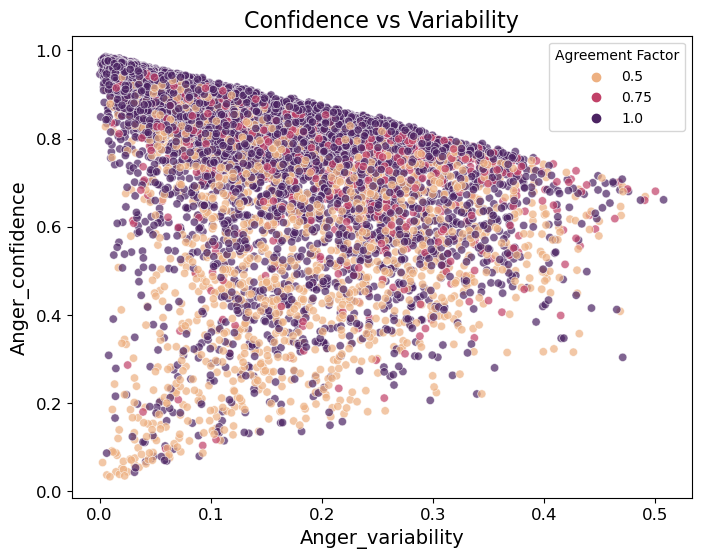

In [210]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="anger_variability", y="anger_confidence", hue='anger_agr_factor_rd', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/conf_vs_var_anger_color_agreement_factor.png", dpi=600, bbox_inches='tight')

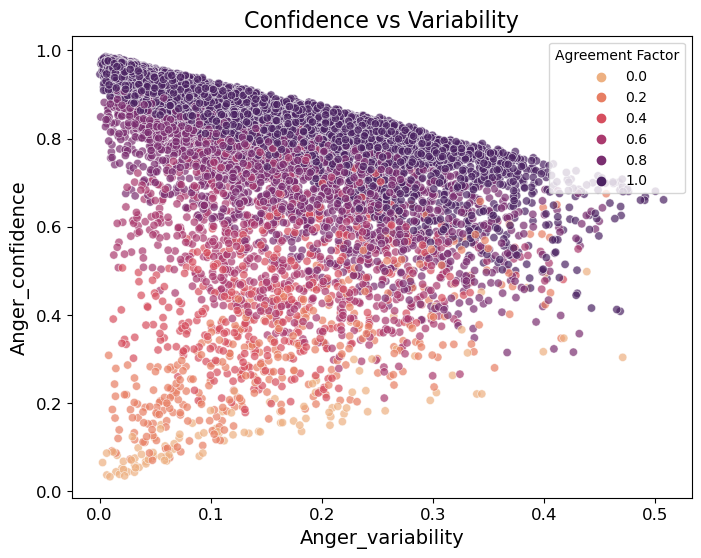

In [212]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="anger_variability", y="anger_confidence", hue='anger_correctness', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/conf_vs_var_anger_color_correctness.png", dpi=600, bbox_inches='tight')

## joy

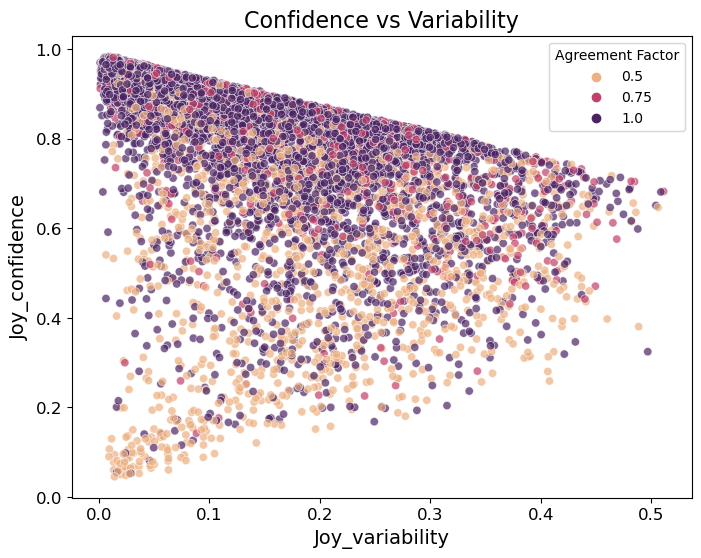

In [214]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="joy_variability", y="joy_confidence", hue='joy_agr_factor_rd', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/conf_vs_var_joy_color_agreement_factor.png", dpi=600, bbox_inches='tight')

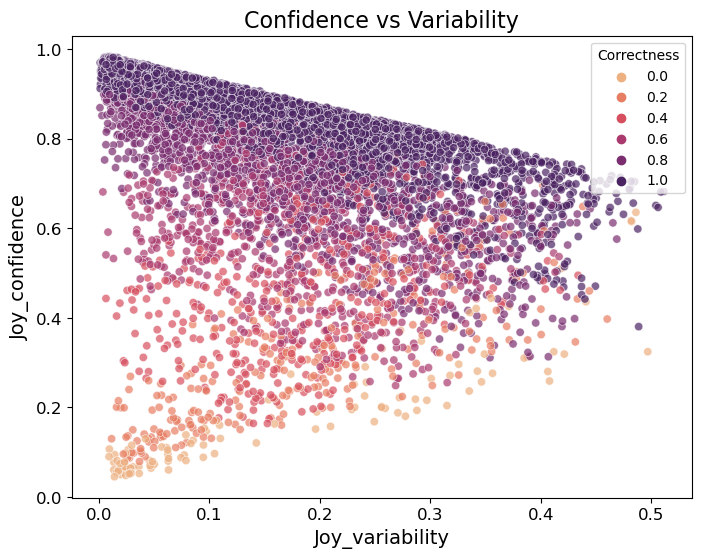

In [222]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="joy_variability", y="joy_confidence", hue='joy_correctness', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Correctness', loc='upper right')
plt.savefig("./plots/conf_vs_var_joy_color_correctness.png", dpi=600, bbox_inches='tight')

## sadness

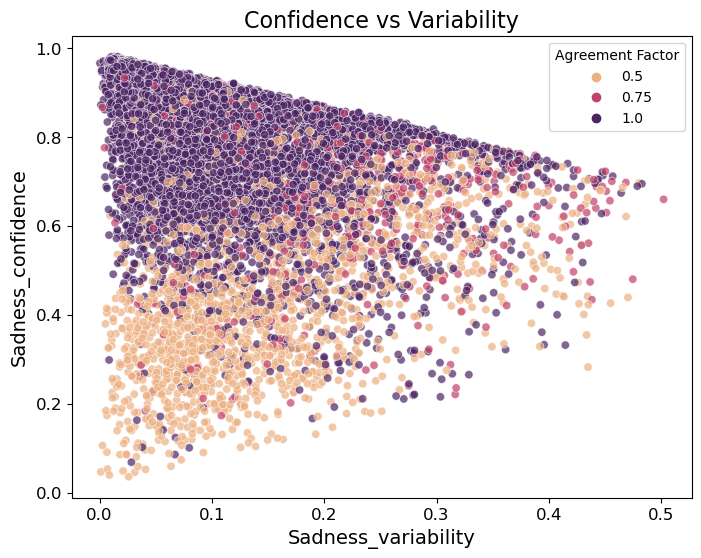

In [216]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="sadness_variability", y="sadness_confidence", hue='sadness_agr_factor_rd', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/conf_vs_var_sadness_color_agreement_factor.png", dpi=600, bbox_inches='tight')

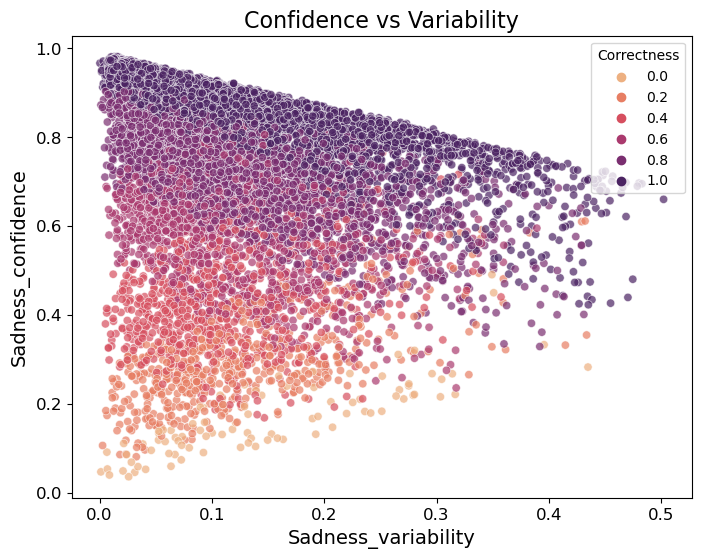

In [220]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="sadness_variability", y="sadness_confidence", hue='sadness_correctness', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Correctness', loc='upper right')
plt.savefig("./plots/conf_vs_var_sadness_color_correctness.png", dpi=600, bbox_inches='tight')

## fear

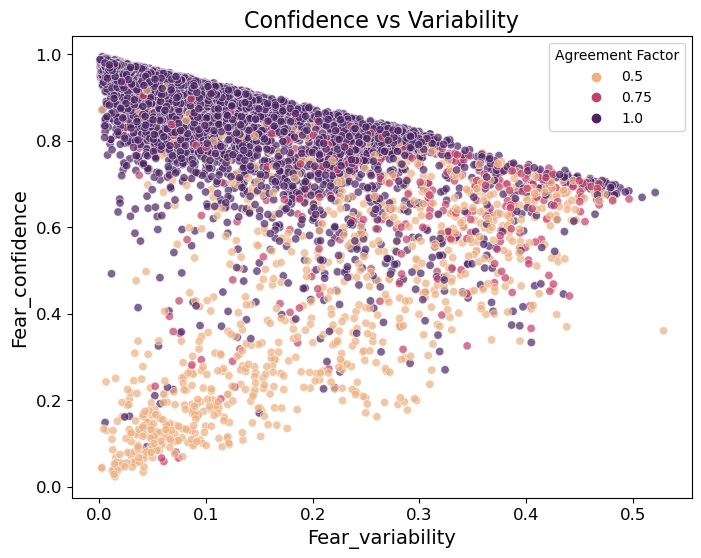

In [218]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="fear_variability", y="fear_confidence", hue='fear_agr_factor_rd', palette='flare', alpha=0.7)

plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("./plots/conf_vs_var_fear_color_agreement_factor.png", dpi=600, bbox_inches='tight')

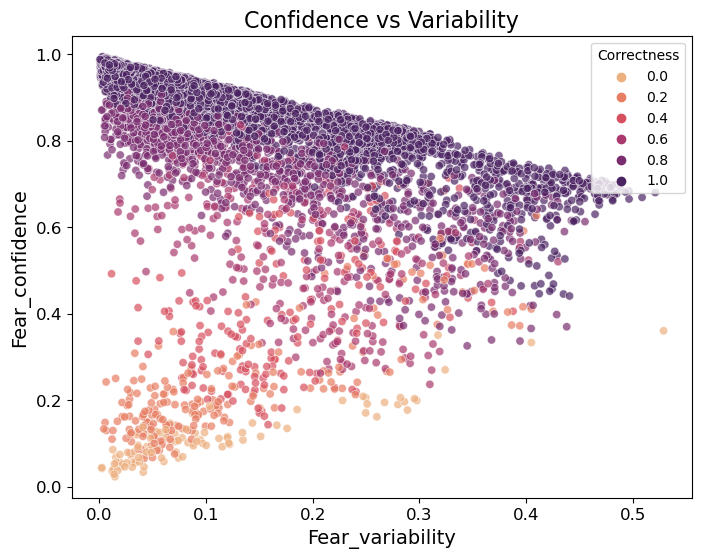

In [221]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cartography_df, x="fear_variability", y="fear_confidence", hue='fear_correctness', palette='flare', alpha=0.7)

plt.title("Confidence vs Variability", fontsize=16)
plt.gca().legend().set_title(str(plt.gca().legend().get_title()).capitalize())
plt.gca().set_xlabel(str(plt.gca().get_xlabel()).capitalize(), fontsize=14)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.legend(title='Agreement Factor', loc='upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Correctness', loc='upper right')
plt.savefig("./plots/conf_vs_var_fear_color_correctness.png", dpi=600, bbox_inches='tight')

## Combined box plots

In [181]:
columns_to_plot = ['anger_confidence', 'joy_confidence', 'sadness_confidence', 'fear_confidence' ]
id_columns = ['anger_agr_factor_rd', 'joy_agr_factor_rd', 'sadness_agr_factor_rd', 'fear_agr_factor_rd', 'anger_y', 'joy_y', 'sadness_y', 'fear_y']
temp_df = cartography_df[['text_id', 'anger_confidence', 'joy_confidence', 'sadness_confidence', 'fear_confidence', 'anger_agr_factor_rd', 'joy_agr_factor_rd', 'sadness_agr_factor_rd', 'fear_agr_factor_rd', 'anger_y', 'joy_y', 'sadness_y', 'fear_y']].copy()

df_melted = pd.melt(temp_df, value_vars=columns_to_plot, id_vars=id_columns, var_name='variable_1', value_name='val_1' )
df_melted.head()

,anger_agr_factor_rd,joy_agr_factor_rd,sadness_agr_factor_rd,fear_agr_factor_rd,anger_y,joy_y,sadness_y,fear_y,variable_1,val_1
0,1.00,0.5,0.5,1.00,0,1,1,0,anger_confidence,0.942198
1,1.00,1.0,1.0,1.00,1,0,0,0,anger_confidence,0.658104
2,1.00,1.0,1.0,0.75,0,0,0,1,anger_confidence,0.936576
3,0.75,1.0,1.0,1.00,1,0,0,0,anger_confidence,0.680606
4,0.75,1.0,1.0,1.00,1,0,0,0,anger_confidence,0.825530


In [182]:
len(df_melted)

39924

In [193]:
id_columns = ['variable_1', 'val_1', 'anger_y', 'joy_y', 'sadness_y', 'fear_y']
columns_to_plot = ['anger_agr_factor_rd', 'joy_agr_factor_rd', 'sadness_agr_factor_rd', 'fear_agr_factor_rd']
#temp_df = cartography_df[['text_id', 'anger_confidence', 'joy_confidence', 'sadness_confidence', 'fear_confidence', 'anger_agr_factor_rd', 'joy_agr_factor_rd', 'sadness_agr_factor_rd', 'fear_agr_factor_rd']].copy()

df_melted_2 = pd.melt(df_melted, value_vars=columns_to_plot, id_vars=id_columns)
df_melted_2.head()

,variable_1,val_1,anger_y,joy_y,sadness_y,fear_y,variable,value
0,anger_confidence,0.942198,0,1,1,0,anger_agr_factor_rd,1.00
1,anger_confidence,0.658104,1,0,0,0,anger_agr_factor_rd,1.00
2,anger_confidence,0.936576,0,0,0,1,anger_agr_factor_rd,1.00
3,anger_confidence,0.680606,1,0,0,0,anger_agr_factor_rd,0.75
4,anger_confidence,0.825530,1,0,0,0,anger_agr_factor_rd,0.75


In [194]:
len(df_melted_2)

159696

In [195]:
df_melted_3 = df_melted_2[df_melted_2.apply(lambda row: (row['variable'].split('_')[0] == row['variable_1'].split('_')[0] and row[row['variable'].split('_')[0] + '_y'] == 1) , axis=1)]
df_melted_3 = df_melted_3.drop(columns=['variable']).reset_index(drop=True)
df_melted_3.columns = ['emotion', 'confidence', 'anger_y', 'joy_y', 'sadness_y', 'fear_y', 'agreement_factor']
df_melted_3['emotion'] = df_melted_3['emotion'].apply(lambda x: x.split('_')[0])
df_melted_3['agreement_factor'] = df_melted_3['agreement_factor'].apply(lambda x: 0.4 if x == 0.2 else x)
df_melted_3.head()

,emotion,confidence,anger_y,joy_y,sadness_y,fear_y,agreement_factor
0,anger,0.658104,1,0,0,0,1.00
1,anger,0.680606,1,0,0,0,0.75
2,anger,0.825530,1,0,0,0,0.75
3,anger,0.359196,1,0,1,1,0.50
4,anger,0.916623,1,0,0,0,1.00


In [196]:
df_melted_3[(df_melted_3['anger_y'] == 1) & (df_melted_3['joy_y'] == 1)]

,emotion,confidence,anger_y,joy_y,sadness_y,fear_y,agreement_factor
11,anger,0.206082,1,1,0,0,0.5
14,anger,0.637006,1,1,0,0,0.5
19,anger,0.400671,1,1,0,0,0.5
28,anger,0.586218,1,1,0,0,0.5
31,anger,0.640546,1,1,1,0,0.5
...,...,...,...,...,...,...,...
12250,fear,0.718011,1,1,0,1,0.5
12311,fear,0.084232,1,1,1,1,0.5
12329,fear,0.216044,1,1,0,1,0.5
12363,fear,0.645257,1,1,0,1,0.5


In [198]:
df_melted_3['agreement_factor'].value_counts()

0.50    6386
0.75    3198
1.00    3055
Name: agreement_factor, dtype: int64

In [199]:
df_melted_3[df_melted_3['emotion']=='sadness']['agreement_factor'].value_counts()

0.50    1933
0.75     672
1.00     536
Name: agreement_factor, dtype: int64

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

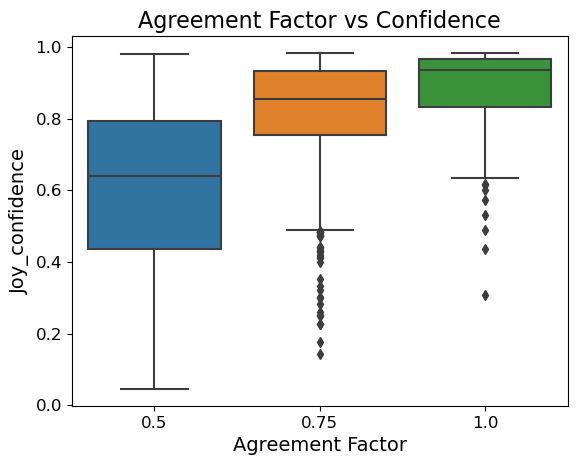

In [200]:
sns.boxplot(data=cartography_df[cartography_df['joy_y']==1], x="joy_agr_factor_rd", y="joy_confidence")
plt.title("Agreement Factor vs Confidence", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [201]:
cartography_df[['fear_y','fear_agr_factor_rd']]

,fear_y,fear_agr_factor_rd
0,0,1.00
1,0,1.00
2,1,0.75
3,0,1.00
4,0,1.00
...,...,...
9976,0,1.00
9977,0,1.00
9978,0,1.00
9979,0,1.00


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

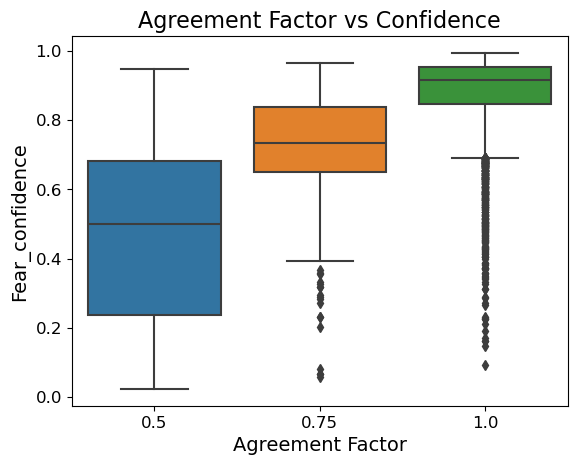

In [202]:
sns.boxplot(data=cartography_df, x="fear_agr_factor_rd", y="fear_confidence")
plt.title("Agreement Factor vs Confidence", fontsize=16)
plt.gca().set_ylabel(str(plt.gca().get_ylabel()).capitalize(), fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.5_fear vs. 1.0_fear: Mann-Whitney-Wilcoxon test two-sided, P_val:1.243e-96 U_stat=3.798e+04
0.5_anger vs. 1.0_anger: Mann-Whitney-Wilcoxon test two-sided, P_val:3.315e-201 U_stat=2.127e+05
0.5_joy vs. 1.0_joy: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=2.159e+05
0.5_sadness vs. 1.0_sadness: Mann-Whitney-Wilcoxon test two-sided, P_val:1.807e-219 U_stat=5.624e+04


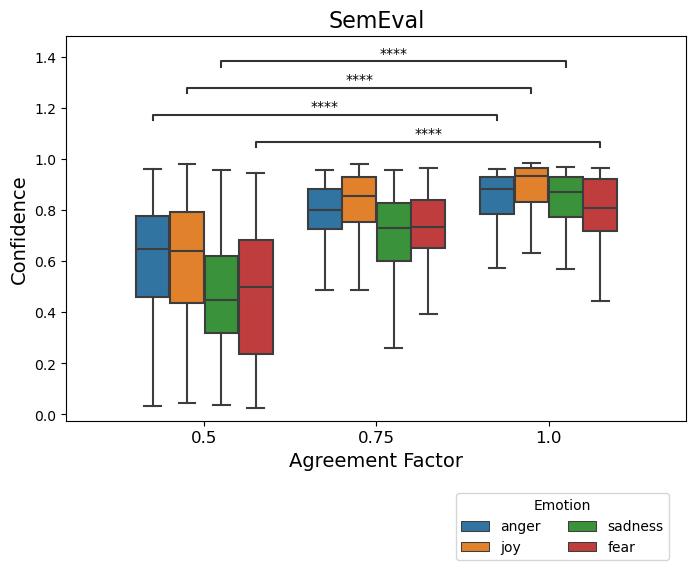

In [203]:
plt.figure(figsize=(8, 5))
# sns.boxplot(data=cartography_df, x='anger_agr_factor_rd', y='anger_confidence', showfliers=False)
# sns.boxplot(data=cartography_df, x='joy_agr_factor_rd', y='joy_confidence', showfliers=False)
# sns.boxplot(data=cartography_df, x='fear_agr_factor_rd', y='fear_confidence', showfliers=False)
# sns.boxplot(data=cartography_df, x='sadness_agr_factor_rd', y='sadness_confidence', showfliers=False)


pairs=[
    ((0.5, "anger"), (1.0, "anger")),
    ((0.5, "joy"), (1.0, "joy")),
    ((0.5, "sadness"), (1.0, "sadness")),
    ((0.5, "fear"), (1.0, "fear"))
    # ((0.4, "joy"), (0.6, "joy")),
    # ((0.4, "joy"), (0.8, "joy")),
    # ((0.4, "joy"), (1.0, "joy")),
    # ((0.6, "joy"), (0.8, "joy")),
    # ((0.6, "joy"), (1.0, "joy")),
    # ((0.8, "joy"), (1.0, "joy")),
    # (("I", "Ideal"), ("I", "Premium")),
    # (("I", "Ideal"), ("I", "Good")),
    # (("J", "Ideal"), ("J", "Premium")),
    # (("J", "Ideal"), ("J", "Good")),
    # (("E", "Good"), ("I", "Ideal")),
    # (("I", "Premium"), ("J", "Ideal")),
    ]


ax = sns.boxplot(data=df_melted_3, x='agreement_factor', y='confidence', hue='emotion', showfliers=False)

annotator = Annotator(ax, pairs, data=df_melted_3, x='agreement_factor', y='confidence', hue='emotion')
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("SemEval", fontsize=16)
plt.gca().set_ylabel('Confidence', fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend(title = 'Emotion',  bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0)
plt.legend(title = 'Emotion', loc='upper center', bbox_to_anchor=(0.8, -0.17), fancybox=True, ncol=2)

plt.savefig("./plots/agr_factor_vs_conf_4.png", dpi=600, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0.5_fear vs. 1.0_fear: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=4.291e+05
0.5_anger vs. 1.0_anger: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=2.438e+06
0.5_joy vs. 1.0_joy: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=2.266e+06
0.5_sadness vs. 1.0_sadness: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=1.406e+06


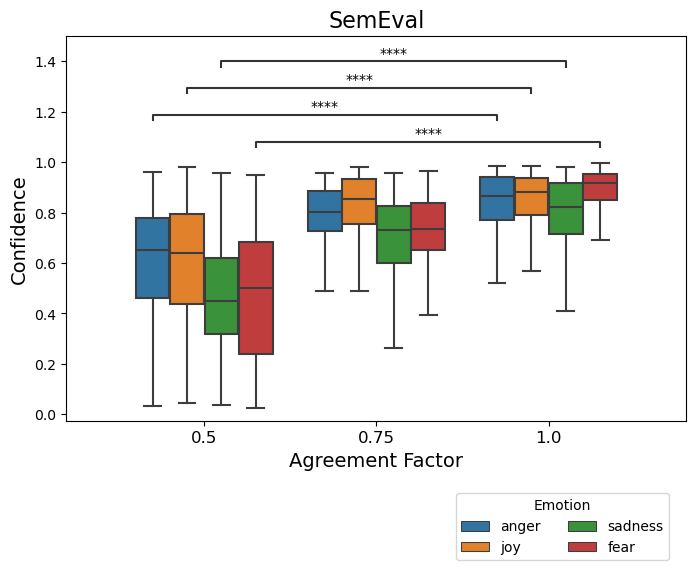

In [208]:
## Combined box plots
columns_to_plot = ['anger_confidence', 'joy_confidence', 'sadness_confidence', 'fear_confidence' ]
id_columns = ['anger_agr_factor_rd', 'joy_agr_factor_rd', 'sadness_agr_factor_rd', 'fear_agr_factor_rd', 'anger_y', 'joy_y', 'sadness_y', 'fear_y']
temp_df = cartography_df[['text_id', 'anger_confidence', 'joy_confidence', 'sadness_confidence', 'fear_confidence', 'anger_agr_factor_rd', 'joy_agr_factor_rd', 'sadness_agr_factor_rd', 'fear_agr_factor_rd', 'anger_y', 'joy_y', 'sadness_y', 'fear_y']].copy()

df_melted = pd.melt(temp_df, value_vars=columns_to_plot, id_vars=id_columns, var_name='variable_1', value_name='val_1' )
df_melted.head()

id_columns = ['variable_1', 'val_1', 'anger_y', 'joy_y', 'sadness_y', 'fear_y']
columns_to_plot = ['anger_agr_factor_rd', 'joy_agr_factor_rd', 'sadness_agr_factor_rd', 'fear_agr_factor_rd']
#temp_df = cartography_df[['text_id', 'anger_confidence', 'joy_confidence', 'sadness_confidence', 'fear_confidence', 'anger_agr_factor_rd', 'joy_agr_factor_rd', 'sadness_agr_factor_rd', 'fear_agr_factor_rd']].copy()

df_melted_2 = pd.melt(df_melted, value_vars=columns_to_plot, id_vars=id_columns)
df_melted_2.head()

df_melted_3 = df_melted_2[df_melted_2.apply(lambda row: (row['variable'].split('_')[0] == row['variable_1'].split('_')[0]) , axis=1)]
df_melted_3 = df_melted_3.drop(columns=['variable']).reset_index(drop=True)
df_melted_3.columns = ['emotion', 'confidence', 'anger_y', 'joy_y', 'sadness_y', 'fear_y', 'agreement_factor']
df_melted_3['emotion'] = df_melted_3['emotion'].apply(lambda x: x.split('_')[0])
df_melted_3['agreement_factor'] = df_melted_3['agreement_factor'].apply(lambda x: 0.4 if x == 0.2 else x)
df_melted_3.head()
df_melted_3[(df_melted_3['anger_y'] == 1) & (df_melted_3['joy_y'] == 1)]

df_melted_3['agreement_factor'].value_counts()
df_melted_3[df_melted_3['emotion']=='sadness']['agreement_factor'].value_counts()


# sns.boxplot(data=cartography_df, x='anger_agr_factor_rd', y='anger_confidence', showfliers=False)
# sns.boxplot(data=cartography_df, x='joy_agr_factor_rd', y='joy_confidence', showfliers=False)
# sns.boxplot(data=cartography_df, x='fear_agr_factor_rd', y='fear_confidence', showfliers=False)
# sns.boxplot(data=cartography_df, x='sadness_agr_factor_rd', y='sadness_confidence', showfliers=False)


pairs=[
    ((0.5, "anger"), (1.0, "anger")),
    ((0.5, "joy"), (1.0, "joy")),
    ((0.5, "sadness"), (1.0, "sadness")),
    ((0.5, "fear"), (1.0, "fear"))
    # ((0.4, "joy"), (0.6, "joy")),
    # ((0.4, "joy"), (0.8, "joy")),
    # ((0.4, "joy"), (1.0, "joy")),
    # ((0.6, "joy"), (0.8, "joy")),
    # ((0.6, "joy"), (1.0, "joy")),
    # ((0.8, "joy"), (1.0, "joy")),
    # (("I", "Ideal"), ("I", "Premium")),
    # (("I", "Ideal"), ("I", "Good")),
    # (("J", "Ideal"), ("J", "Premium")),
    # (("J", "Ideal"), ("J", "Good")),
    # (("E", "Good"), ("I", "Ideal")),
    # (("I", "Premium"), ("J", "Ideal")),
    ]

plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=df_melted_3, x='agreement_factor', y='confidence', hue='emotion', showfliers=False)

annotator = Annotator(ax, pairs, data=df_melted_3, x='agreement_factor', y='confidence', hue='emotion')
annotator.configure(test='Mann-Whitney', text_format='star')
annotator.apply_and_annotate()

plt.title("SemEval", fontsize=16)
plt.gca().set_ylabel('Confidence', fontsize=14)
plt.gca().set_xlabel('Agreement Factor', fontsize=14)
plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend(title = 'Emotion',  bbox_to_anchor=(1.01, 1), loc='best', borderaxespad=0)
plt.legend(title = 'Emotion', loc='upper center', bbox_to_anchor=(0.8, -0.17), fancybox=True, ncol=2)

plt.savefig("./plots/agr_factor_vs_conf_4_full.png", dpi=600, bbox_inches='tight')

## Pearson corr coefficient and p-values

In [209]:
from scipy.stats import pearsonr

correlation_data = {'emotion': [], 'corr_coef': [], 'p_value': []}

for emotion in ['anger', 'joy', 'sadness', 'fear']:
    temp_df = cartography_df[cartography_df[emotion + '_y'] == 1]
    stats = pearsonr(temp_df[emotion + '_confidence'], temp_df[emotion + '_agr_factor_rd'])
    correlation_data['emotion'].append(emotion)
    correlation_data['corr_coef'].append(stats[0])
    correlation_data['p_value'].append(stats[1])


corr_df = pd.DataFrame(correlation_data)
corr_df.head()

,emotion,corr_coef,p_value
0,anger,0.507954,3.237030e-242
1,joy,0.592577,0.000000e+00
2,sadness,0.636136,0.000000e+00
3,fear,0.547008,2.704656e-136
